In [3]:
import tensorflow as tf
from tensorflow import keras
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.test.is_built_with_cuda()
print(tf.version.VERSION)
import sys
sys.version

Num GPUs Available:  1
2.6.0


'3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]'

In [7]:
print(cv2.__version__)

4.6.0


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [64]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D,AveragePooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [5]:
picture_size = 48
folder_path = "C:\\Users\\errar\\Projects\\Face emotions\\Dataset"

In [6]:
batch_size = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()


train_set = datagen_train.flow_from_directory(folder_path+"\\train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


val_set = datagen_val.flow_from_directory(folder_path+"\\validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [128]:
no_of_classes = 7

model = Sequential()

model.add(Conv2D(64,(3,3), padding = 'same', input_shape =(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))



model.add(Flatten()) 


model.add(Dense(512)) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(256)) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation = 'softmax'))

opt = Adam(lr = 0.0001)
model.compile(optimizer= opt, loss= 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_170 (Conv2D)          (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_217 (Bat (None, 48, 48, 64)        256       
_________________________________________________________________
activation_218 (Activation)  (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_154 (MaxPoolin (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_182 (Dropout)        (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_171 (Conv2D)          (None, 24, 24, 256)       147712    
_________________________________________________________________
batch_normalization_218 (Bat (None, 24, 24, 256)     

C:\Users\errar\anaconda3\envs\gpu\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [137]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.0001),
              metrics=['accuracy'])

C:\Users\errar\anaconda3\envs\gpu\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [138]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = val_set,
                                validation_steps = val_set.n//val_set.batch_size,
                                callbacks=callbacks_list
                                )

C:\Users\errar\anaconda3\envs\gpu\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/48
225/225 [==============================] - 13s 51ms/step - loss: 1.1652 - accuracy: 0.5633 - val_loss: 1.0677 - val_accuracy: 0.5922
Epoch 2/48
225/225 [==============================] - 11s 48ms/step - loss: 1.1322 - accuracy: 0.5739 - val_loss: 1.0511 - val_accuracy: 0.5973
Epoch 3/48
225/225 [==============================] - 11s 48ms/step - loss: 1.1122 - accuracy: 0.5829 - val_loss: 1.0409 - val_accuracy: 0.6033
Epoch 4/48
225/225 [==============================] - 11s 50ms/step - loss: 1.0956 - accuracy: 0.5919 - val_loss: 1.0322 - val_accuracy: 0.6030
Epoch 5/48
225/225 [==============================] - 11s 49ms/step - loss: 1.0810 - accuracy: 0.5941 - val_loss: 1.0256 - val_accuracy: 0.6081
Epoch 6/48
225/225 [==============================] - 11s 49ms/step - loss: 1.0702 - accuracy: 0.6005 - val_loss: 1.0199 - val_accuracy: 0.6075
Epoch 7/48
225/225 [==============================] - 11s 48ms/step - loss: 1.0602 - accuracy: 0.6040 - val_loss: 1.0149 - val_accuracy:

In [140]:
model.save("C:\\Users\\errar\\Projects\\Face emotions\\model.h5")

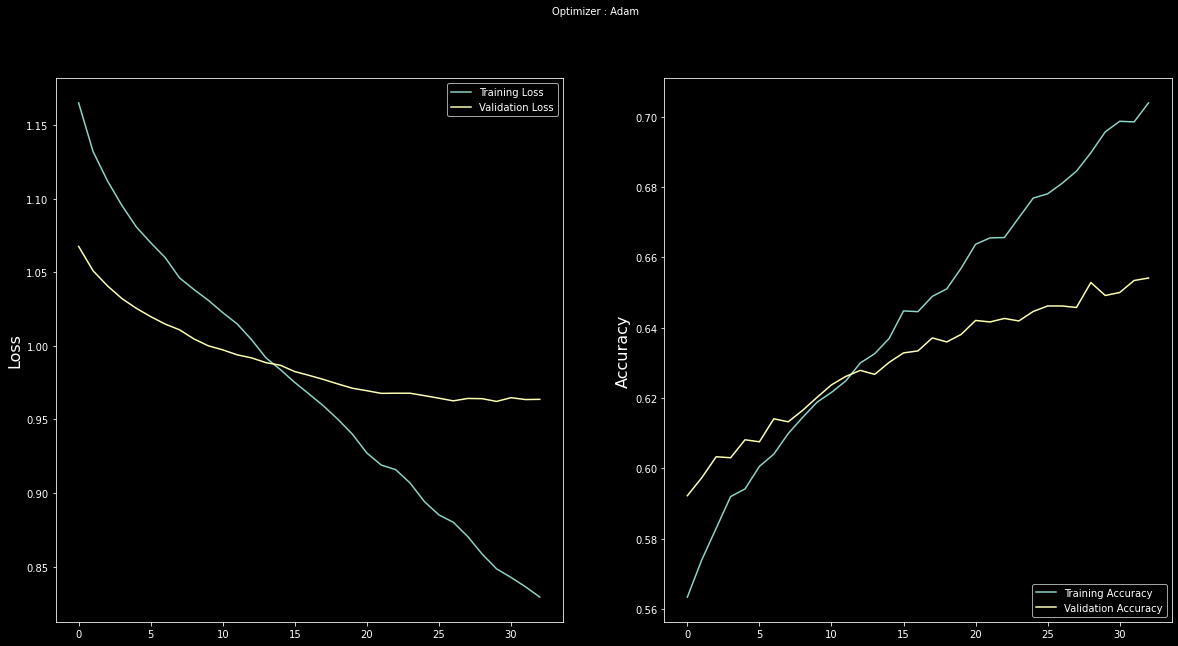

In [141]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()